In [41]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [43]:
data_dir = "C:\\Users\\nilss\\coding\\material\\ki_workshop\\data"
os.chdir(data_dir)

# Introducing MGH data

[Olink MGH Intro](https://www.olink.com/mgh-covid-study/)

[Olink MGH Overview](https://info.olink.com/mgh-covid-study-overview-page)
- ~384 patients
- Protein data from Olink
- Clinical data

[Published Article](https://www.cell.com/action/showPdf?pii=S2666-3791%2821%2900115-4)


We are combining OLINK & clinical data from Covid patients. Specifically, we are replicating figure B (page 5) from the published article

In [ ]:
clinical = pd.read_csv('clinical_with_severity.csv')
olink = pd.read_csv('MGH_COVID_OLINK_NPX.csv')

## First inspection clinical data

In [22]:
clinical

,subject_id,COVID,Age cat,BMI cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,...,crp_3_cat,ddimer_3_cat,ldh_3_cat,abs_neut_7_cat,abs_lymph_7_cat,abs_mono_7_cat,creat_7_cat,crp_7_cat,ddimer_7_cat,ldh_7_cat
0,1,1,1,4,0,0,0,0,0,0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,2,2,0,0,0,0,0,0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,3,4,0,1,0,0,0,0,...,3.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,2,0,0,0,0,0,0,...,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,3,3,0,0,0,1,1,0,...,5.0,3.0,NaN,3.0,5.0,3.0,1.0,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,382,1,1,3,0,0,0,0,0,0,...,4.0,3.0,3.0,3.0,1.0,1.0,1.0,5.0,3.0,2.0
380,383,1,5,1,0,0,1,1,1,0,...,NaN,5.0,3.0,5.0,2.0,2.0,3.0,NaN,NaN,NaN
381,384,1,5,2,1,0,0,0,1,0,...,3.0,3.0,2.0,2.0,2.0,3.0,2.0,NaN,NaN,NaN
382,385,1,3,3,0,0,0,0,0,0,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject_id       384 non-null    int64  
 1   COVID            384 non-null    int64  
 2   Age cat          384 non-null    int64  
 3   BMI cat          384 non-null    int64  
 4   HEART            384 non-null    int64  
 5   LUNG             384 non-null    int64  
 6   KIDNEY           384 non-null    int64  
 7   DIABETES         384 non-null    int64  
 8   HTN              384 non-null    int64  
 9   IMMUNO           384 non-null    int64  
 10  Resp_Symp        384 non-null    int64  
 11  Fever_Sympt      384 non-null    int64  
 12  GI_Symp          384 non-null    int64  
 13  WHO 0            384 non-null    int64  
 14  WHO 3            384 non-null    int64  
 15  WHO 7            384 non-null    int64  
 16  WHO 28           384 non-null    int64  
 17  WHO max         

In [23]:
clinical.COVID.value_counts()

1    306
0     78
Name: COVID, dtype: int64

In [24]:
clinical.HEART.value_counts()

0    313
1     71
Name: HEART, dtype: int64

<AxesSubplot:xlabel='Age cat', ylabel='count'>

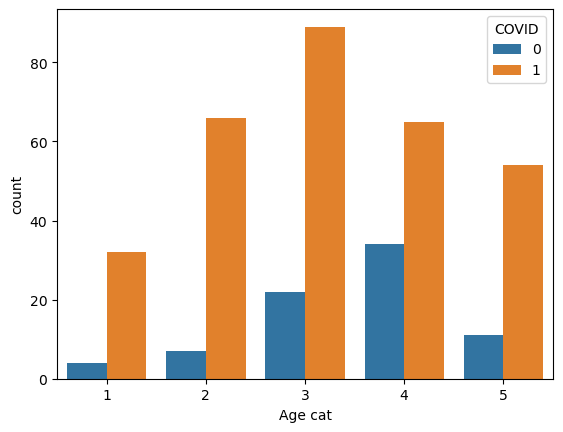

In [37]:
sns.countplot(data=clinical, x="Age cat", hue="COVID")

<AxesSubplot:>

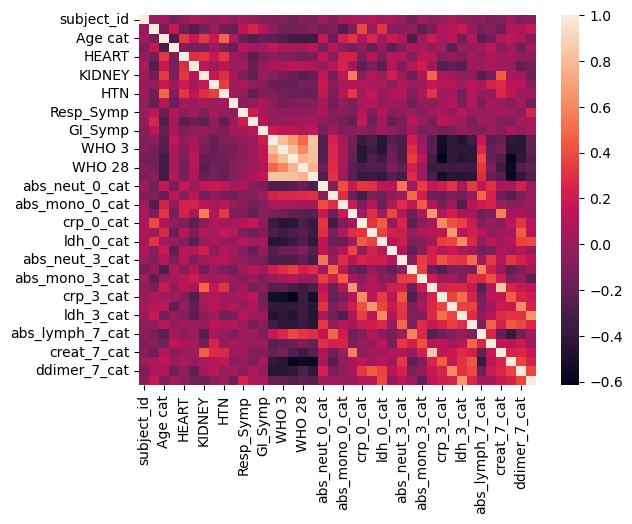

In [38]:
sns.heatmap(clinical.corr())

<AxesSubplot:>

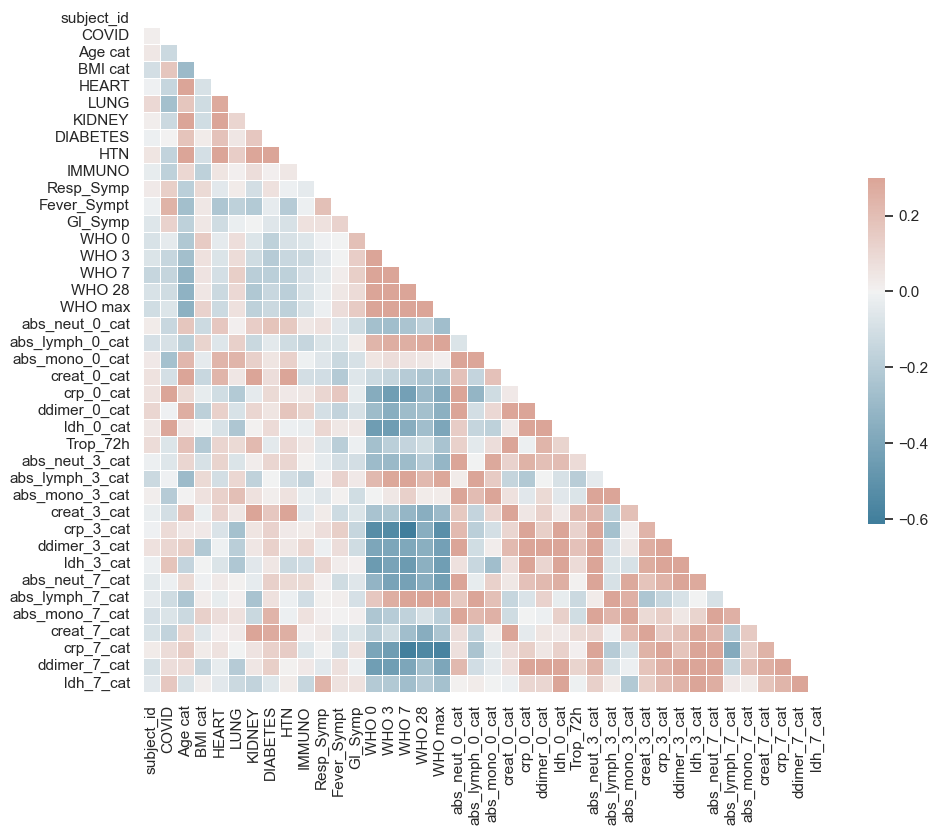

In [42]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = clinical.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Olink data | First inspection!

In [44]:
olink

,SampleID,subject_id,Timepoint,OlinkID,UniProt,Panel,PlateID,LOD,NPX
0,1_D0,1.0,D0,OID21311,Q9BTE6,ONCOLOGY,20200772_Plate5_NEURO_ONC,0.7204,3.2277
1,1_D0,1.0,D0,OID20921,Q96IU4,NEUROLOGY,20200772_Plate5_NEURO_ONC,0.5696,0.7205
2,1_D0,1.0,D0,OID21280,P00519,ONCOLOGY,20200772_Plate5_NEURO_ONC,0.5313,2.6293
3,1_D0,1.0,D0,OID21269,P09110,ONCOLOGY,20200772_Plate5_NEURO_ONC,2.0588,3.2670
4,1_D0,1.0,D0,OID20159,P16112,CARDIOMETABOLIC,20200772_Plate5_CARDIO_INF,1.1623,2.0308
...,...,...,...,...,...,...,...,...,...
1148911,CONTROL_SAMPLE_AS-2,NaN,NaN,OID20082,Q13105,CARDIOMETABOLIC,20200772_plate7_CARDIO_INF,0.5020,1.0699
1148912,CONTROL_SAMPLE_AS-2,NaN,NaN,OID20082,Q13105,CARDIOMETABOLIC,20200772_PLATE3_CARDIO_INF,0.5020,1.0344
1148913,CONTROL_SAMPLE_AS-2,NaN,NaN,OID20082,Q13105,CARDIOMETABOLIC,20200772_Plate9_CAR_INF,0.5020,1.2529
1148914,CONTROL_SAMPLE_AS-2,NaN,NaN,OID20082,Q13105,CARDIOMETABOLIC,20200772_Plate5_CARDIO_INF,0.5020,1.1065


In [46]:
olink = olink[["SampleID", "UniProt", "NPX"]]
olink

,SampleID,UniProt,NPX
0,1_D0,Q9BTE6,3.2277
1,1_D0,Q96IU4,0.7205
2,1_D0,P00519,2.6293
3,1_D0,P09110,3.2670
4,1_D0,P16112,2.0308
...,...,...,...
1148911,CONTROL_SAMPLE_AS-2,Q13105,1.0699
1148912,CONTROL_SAMPLE_AS-2,Q13105,1.0344
1148913,CONTROL_SAMPLE_AS-2,Q13105,1.2529
1148914,CONTROL_SAMPLE_AS-2,Q13105,1.1065


In [47]:
# 1429 different UniProt with NPX value per SampleId
olink.SampleID.value_counts()

CONTROL_SAMPLE_AS-1    18577
CONTROL_SAMPLE_AS-2    10003
341_D0                  1429
336_D0                  1429
336_D3                  1429
                       ...  
218_D3                  1429
219_D0                  1429
22_D0                   1429
22_D3                   1429
281_D0                  1429
Name: SampleID, Length: 786, dtype: int64

In [49]:
# 18 values missing for NPX
olink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148916 entries, 0 to 1148915
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   SampleID  1148916 non-null  object 
 1   UniProt   1148916 non-null  object 
 2   NPX       1148898 non-null  float64
dtypes: float64(1), object(2)
memory usage: 26.3+ MB


In [51]:
olink.isna().value_counts()

SampleID  UniProt  NPX  
False     False    False    1148898
                   True          18
dtype: int64

## preprocessing OLINK data

In [ ]:
# reshaping

In [67]:
olink_reshaped = olink.pivot_table(columns = "UniProt", index = "SampleID", values = "NPX")
olink_reshaped

UniProt,A1L4H1,A4D1B5,A6NI73,B1AKI9,NTproBNP,O00161,O00175,O00182,O00186,O00214,...,Q9Y639,Q9Y653,Q9Y662,Q9Y680,Q9Y6A5,Q9Y6D9,Q9Y6K9,Q9Y6N7,Q9Y6Q6,Q9Y6Y9
SampleID,,,,,,,,,,,,,,,,,,,,,
100_D0,2.698300,-1.493100,4.512300,3.245600,-0.351600,4.992800,2.558400,8.319100,0.341000,4.250400,...,-0.239800,2.161200,3.702300,0.875000,1.318100,3.350200,5.759200,4.308400,5.203500,0.276900
100_D3,2.714700,-1.259300,4.363800,3.374800,0.131000,2.773800,3.532000,8.364800,-0.124700,3.758600,...,-1.170300,1.470800,3.310500,0.217100,-0.302900,3.218200,3.297200,4.269600,5.362400,0.536900
101_D0,2.959400,-0.919600,4.542400,2.631200,0.384200,3.632700,3.872800,8.163800,0.456700,3.395000,...,-0.020300,2.845400,2.900000,1.991200,0.505600,3.164700,4.075000,3.772400,4.391400,0.717500
101_D3,2.430000,-1.380700,3.829500,2.609600,1.846700,1.526500,3.983200,7.795700,-0.020400,2.796200,...,-0.085200,1.695900,2.202700,-0.412800,-0.100900,2.678700,2.170000,3.505200,4.346900,0.513600
101_D7,3.146300,-0.079700,4.113900,2.148600,1.775700,9.250600,6.062200,8.690200,5.012900,8.757300,...,0.242100,2.491400,2.124200,2.528200,6.404600,3.899100,9.188100,4.080100,5.133900,0.463000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99_D3,2.563400,-1.393000,4.587300,3.161500,1.306800,3.652200,5.698500,8.901700,0.141600,2.808900,...,0.361100,1.923700,2.742100,0.121900,0.751200,4.012300,4.214400,3.867400,6.201700,0.310200
9_D0,2.100800,-0.769000,4.244400,4.202800,4.548400,4.272900,7.346500,9.372400,0.292900,3.856400,...,-0.346800,3.592100,2.494800,0.242100,0.276800,4.623800,4.518500,3.723900,6.740600,1.405800
9_D3,2.267700,-1.213200,4.154900,3.317300,4.044000,4.376700,7.420300,8.785900,0.069200,3.526900,...,-0.591600,3.301500,2.139800,0.460800,0.523000,3.631400,4.362800,3.584700,6.117100,1.521500


In [71]:
olink_reshaped.isna().sum().sum()

18

In [ ]:
# imputing for missing values
from sklearn.impute import SimpleImputer

In [73]:
imputer = SimpleImputer(strategy="mean")
imputer.fit_transform(olink_reshaped)
olink_reshaped[:] = imputer.fit_transform(olink_reshaped)

In [74]:
olink_reshaped.isna().sum().sum()

0

In [75]:
# scaling
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()
olink_reshaped[:] = scaler.fit_transform(olink_reshaped)

In [ ]:
# truncating outliers
    # truncating z-scores at +-4 (following the study)

In [77]:
def trunc_4(x):
    if x > 4:
        return 4
    elif x < -4:
        return -4
    else:
        return x

In [78]:
olink_reshaped = olink_reshaped.applymap(trunc_4)

## Clinical data | First inspection

In [13]:
clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject_id       384 non-null    int64  
 1   COVID            384 non-null    int64  
 2   Age cat          384 non-null    int64  
 3   BMI cat          384 non-null    int64  
 4   HEART            384 non-null    int64  
 5   LUNG             384 non-null    int64  
 6   KIDNEY           384 non-null    int64  
 7   DIABETES         384 non-null    int64  
 8   HTN              384 non-null    int64  
 9   IMMUNO           384 non-null    int64  
 10  Resp_Symp        384 non-null    int64  
 11  Fever_Sympt      384 non-null    int64  
 12  GI_Symp          384 non-null    int64  
 13  WHO 0            384 non-null    int64  
 14  WHO 3            384 non-null    int64  
 15  WHO 7            384 non-null    int64  
 16  WHO 28           384 non-null    int64  
 17  WHO max         

In [16]:
clinical.head(3)

,subject_id,COVID,Age cat,BMI cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,...,ddimer_3_cat,ldh_3_cat,abs_neut_7_cat,abs_lymph_7_cat,abs_mono_7_cat,creat_7_cat,crp_7_cat,ddimer_7_cat,ldh_7_cat,Severity
0,1,1,1,4,0,0,0,0,0,0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-severe
1,2,1,2,2,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-severe
2,3,1,3,4,0,1,0,0,0,0,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-severe


In [15]:
clinical.size

15744

### Heatmap of correlations

In [17]:
clinical.corr()

,subject_id,COVID,Age cat,BMI cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,...,crp_3_cat,ddimer_3_cat,ldh_3_cat,abs_neut_7_cat,abs_lymph_7_cat,abs_mono_7_cat,creat_7_cat,crp_7_cat,ddimer_7_cat,ldh_7_cat
subject_id,1.000000,0.015351,0.036063,-0.101286,-0.008801,0.097148,0.016387,-0.019752,0.047622,-0.031753,...,-0.007025,0.062715,-0.016332,-0.045895,-0.039668,-0.094176,-0.082829,0.022655,-0.087935,-0.052894
COVID,0.015351,1.000000,-0.128578,0.170967,-0.143026,-0.267415,-0.134743,0.003157,-0.162940,-0.175632,...,0.088151,0.110392,0.180513,-0.014362,-0.118126,-0.076660,-0.161420,0.084679,0.077838,0.161656
Age cat,0.036063,-0.128578,1.000000,-0.293622,0.319908,0.168288,0.329035,0.178045,0.482098,0.102562,...,0.033935,0.133494,-0.153508,0.095160,-0.229899,-0.133656,0.103075,0.147968,0.088386,-0.090736
BMI cat,-0.101286,0.170967,-0.293622,1.000000,-0.087619,-0.120519,-0.112929,0.025426,-0.096778,-0.175039,...,0.032374,-0.218406,-0.006522,-0.008861,0.019185,0.130672,-0.062397,0.025868,-0.150349,0.016407
HEART,-0.008801,-0.143026,0.319908,-0.087619,1.000000,0.276119,0.325208,0.185641,0.324964,0.048023,...,-0.081699,-0.012212,-0.072384,0.030650,-0.028912,0.076660,0.008991,0.058991,-0.034292,-0.052587
LUNG,0.097148,-0.267415,0.168288,-0.120519,0.276119,1.000000,0.114128,0.044004,0.140692,0.007582,...,-0.258117,-0.192375,-0.225605,0.006787,0.013196,0.061248,0.030501,-0.003095,-0.200818,-0.132021
KIDNEY,0.016387,-0.134743,0.329035,-0.112929,0.325208,0.114128,1.000000,0.161871,0.290688,0.075967,...,0.053635,0.044058,-0.056868,-0.037930,-0.246366,-0.135771,0.456017,0.056432,0.046493,-0.157354
DIABETES,-0.019752,0.003157,0.178045,0.025426,0.185641,0.044004,0.161871,1.000000,0.346672,0.013835,...,0.122917,0.128161,0.045911,0.131624,0.061510,0.239585,0.273049,0.125154,0.132350,-0.067249
HTN,0.047622,-0.162940,0.482098,-0.096778,0.324964,0.140692,0.290688,0.346672,1.000000,0.037311,...,0.030369,0.038868,-0.130624,0.090495,-0.016013,-0.016663,0.258759,0.143587,0.003935,0.024108
IMMUNO,-0.031753,-0.175632,0.102562,-0.175039,0.048023,0.007582,0.075967,0.013835,0.037311,1.000000,...,0.022907,0.101805,-0.106938,0.096372,-0.108369,0.064621,0.009626,-0.064749,0.032918,-0.143122


In [18]:
import seaborn as sns

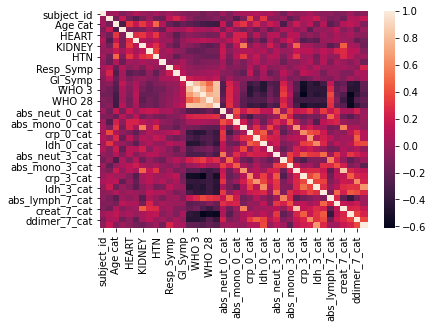

In [19]:
sns.heatmap(clinical.corr())

In [20]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Hello')

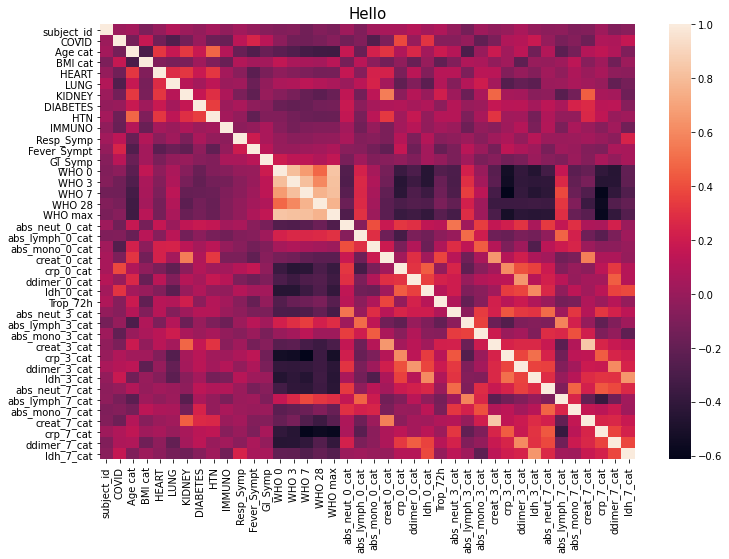

In [21]:
plt.figure(figsize = (12, 8))
sns.heatmap(clinical.corr())
plt.title("Hello", fontsize = 15)

### Better looking heatmap | Copy & Paste!

google seaborn > gallery > heatmap at 4th row

https://seaborn.pydata.org/examples/many_pairwise_correlations.html

In [23]:
import numpy as np

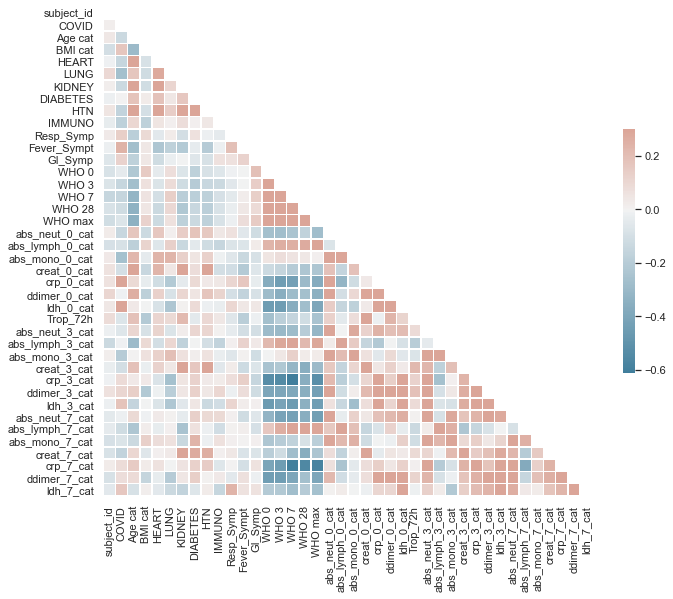

In [25]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = clinical.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Olink data | First inspection!

In [28]:
olink = olink[["SampleID", "UniProt", "NPX"]]

In [29]:
olink

,SampleID,UniProt,NPX
0,1_D0,Q9BTE6,3.2277
1,1_D0,Q96IU4,0.7205
2,1_D0,P00519,2.6293
3,1_D0,P09110,3.2670
4,1_D0,P16112,2.0308
...,...,...,...
1113275,99_D3,O43895,2.5027
1113276,99_D3,P07947,3.7681
1113277,99_D3,Q7Z739,0.9126
1113278,99_D3,Q05516,1.8974


In [30]:
# reshaping

In [32]:
example = olink.loc[olink["SampleID"] == "1_D0"]

In [33]:
example

,SampleID,UniProt,NPX
0,1_D0,Q9BTE6,3.2277
1,1_D0,Q96IU4,0.7205
2,1_D0,P00519,2.6293
3,1_D0,P09110,3.2670
4,1_D0,P16112,2.0308
...,...,...,...
1415,1_D0,O43895,4.8863
1416,1_D0,P07947,4.9975
1417,1_D0,Q7Z739,0.9208
1418,1_D0,Q05516,1.2148


In [36]:
olink_reshaped = olink.pivot_table(columns = "UniProt", index = "SampleID", values = "NPX")

### Preprocessing

In [37]:
# imputing

In [38]:
from sklearn.impute import SimpleImputer

In [39]:
imputer = SimpleImputer(strategy="mean")

In [40]:
imputer.fit_transform(olink_reshaped)

array([[ 2.6983, -1.4931,  4.5123, ...,  4.3084,  5.2035,  0.2769],
       [ 2.7147, -1.2593,  4.3638, ...,  4.2696,  5.3624,  0.5369],
       [ 2.9594, -0.9196,  4.5424, ...,  3.7724,  4.3914,  0.7175],
       ...,
       [ 2.5634, -1.393 ,  4.5873, ...,  3.8674,  6.2017,  0.3102],
       [ 2.1008, -0.769 ,  4.2444, ...,  3.7239,  6.7406,  1.4058],
       [ 2.2677, -1.2132,  4.1549, ...,  3.5847,  6.1171,  1.5215]])

In [41]:
olink_reshaped[:] = imputer.fit_transform(olink_reshaped)

In [42]:
# scaling

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [46]:
olink_reshaped[:] = scaler.fit_transform(olink_reshaped)

In [ ]:
# Last preprocessing step!: 
    # truncating z-scores at +-4 (sort of following the study)

In [47]:
def trunc_4(x):
    if x > 4:
        return 4
    elif x < -4:
        return -4
    else:
        return x

In [49]:
olink_reshaped = olink_reshaped.applymap(trunc_4)

In [50]:
# We are now happy with our reshaping & preprocessing

In [52]:
olink_reshaped.to_csv("olink_reshaped.csv")

## UMAP

In [80]:
#!pip install umap-learn

     ---------------------------------------- 88.2/88.2 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.1/1.1 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82814 sha256=616ff1392ca75feeaa4db89b439292e1ed987bea88157ee622987df3481b9622
  Stored in directory: c:\users\nilss\appdata\local\pip\cache\wheels\f4\3e\1c\596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55496 sha256=16b6cdbc56d641936db2bad2c793cd58a791998ed70b6fcb27c20f3d66e2bfbc
  Stored in directory: c:\users\nilss\appdata\local\pip\cache\wheels\b9\89\cc\59ab91ef5b21dc2ab3635528d7d227f49dfc9169905dcb959d
Successfully built umap-learn pynndescent


In [81]:
import umap

In [91]:
olink_reshaped.shape

(786, 1420)

In [176]:
reducer = umap.UMAP(random_state = 42)
embedding = reducer.fit_transform(olink_reshaped)
embedding = pd.DataFrame(embedding)

embedding.head()

,0,1
0,12.473645,8.952971
1,11.750196,6.323288
2,13.120202,7.012861
3,13.120067,5.781055
4,10.936535,11.793110


<AxesSubplot:xlabel='0', ylabel='1'>

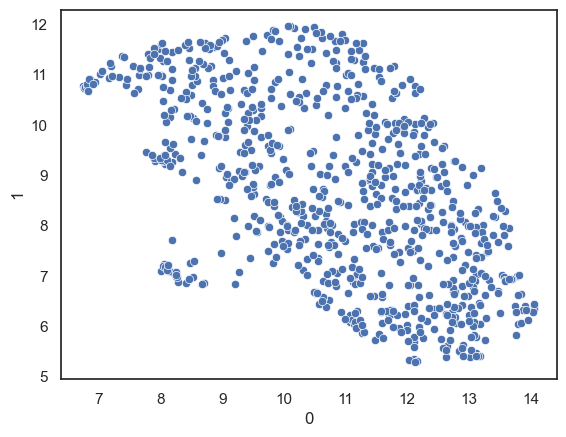

In [177]:
sns.scatterplot(data = embedding, x = 0, y = 1)

## adding in clinical data

In [178]:
olink

,SampleID,subject_id,Timepoint,OlinkID,UniProt,Panel,PlateID,LOD,NPX
0,1_D0,1.0,D0,OID21311,Q9BTE6,ONCOLOGY,20200772_Plate5_NEURO_ONC,0.7204,3.2277
1,1_D0,1.0,D0,OID20921,Q96IU4,NEUROLOGY,20200772_Plate5_NEURO_ONC,0.5696,0.7205
2,1_D0,1.0,D0,OID21280,P00519,ONCOLOGY,20200772_Plate5_NEURO_ONC,0.5313,2.6293
3,1_D0,1.0,D0,OID21269,P09110,ONCOLOGY,20200772_Plate5_NEURO_ONC,2.0588,3.2670
4,1_D0,1.0,D0,OID20159,P16112,CARDIOMETABOLIC,20200772_Plate5_CARDIO_INF,1.1623,2.0308
...,...,...,...,...,...,...,...,...,...
1148911,CONTROL_SAMPLE_AS-2,NaN,NaN,OID20082,Q13105,CARDIOMETABOLIC,20200772_plate7_CARDIO_INF,0.5020,1.0699
1148912,CONTROL_SAMPLE_AS-2,NaN,NaN,OID20082,Q13105,CARDIOMETABOLIC,20200772_PLATE3_CARDIO_INF,0.5020,1.0344
1148913,CONTROL_SAMPLE_AS-2,NaN,NaN,OID20082,Q13105,CARDIOMETABOLIC,20200772_Plate9_CAR_INF,0.5020,1.2529
1148914,CONTROL_SAMPLE_AS-2,NaN,NaN,OID20082,Q13105,CARDIOMETABOLIC,20200772_Plate5_CARDIO_INF,0.5020,1.1065


In [179]:
# add in sample id 
embedding["SampleId"] = olink_reshaped.index

In [180]:
# drop control samples
embedding = embedding.loc[~embedding["SampleId"].str.contains("CONTROL")]

In [181]:
# enable join with clinical data
    # extract subject_id from SampleId
    # convert to int
embedding["subject_id"] = embedding.SampleId.str.extract(r"([0-9]+)")[0]
embedding["subject_id"] = embedding["subject_id"].astype(int)
embedding.head()

,0,1,SampleId,subject_id
0,12.473645,8.952971,100_D0,100
1,11.750196,6.323288,100_D3,100
2,13.120202,7.012861,101_D0,101
3,13.120067,5.781055,101_D3,101
4,10.936535,11.793110,101_D7,101


In [182]:
final_df = embedding.merge(clinical, on="subject_id")

## final viz

<AxesSubplot:xlabel='0', ylabel='1'>

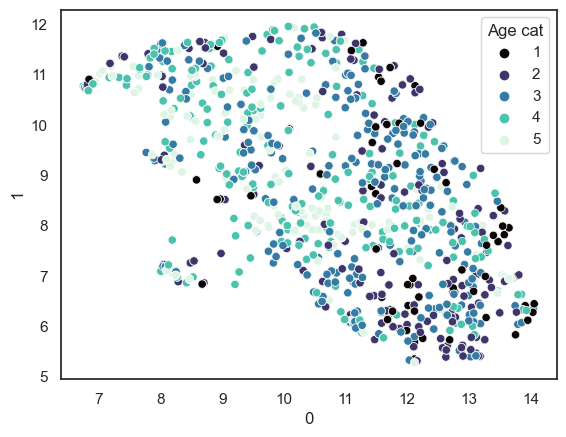

In [183]:
sns.scatterplot(data = final_df, x = 0, y = 1, hue = "Age cat", palette = "mako")

<AxesSubplot:xlabel='0', ylabel='1'>

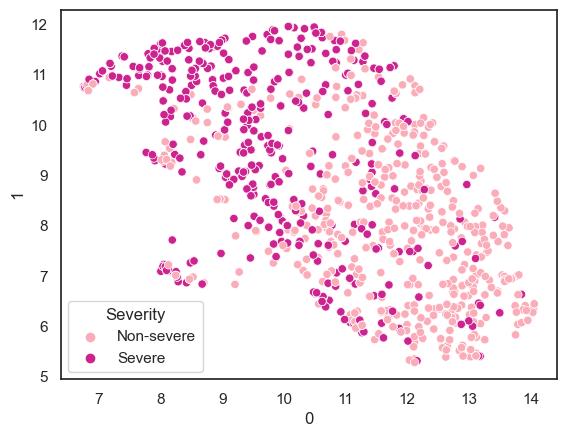

In [184]:
sns.scatterplot(data = final_df, x = 0, y = 1, hue = "Severity", palette = "RdPu")